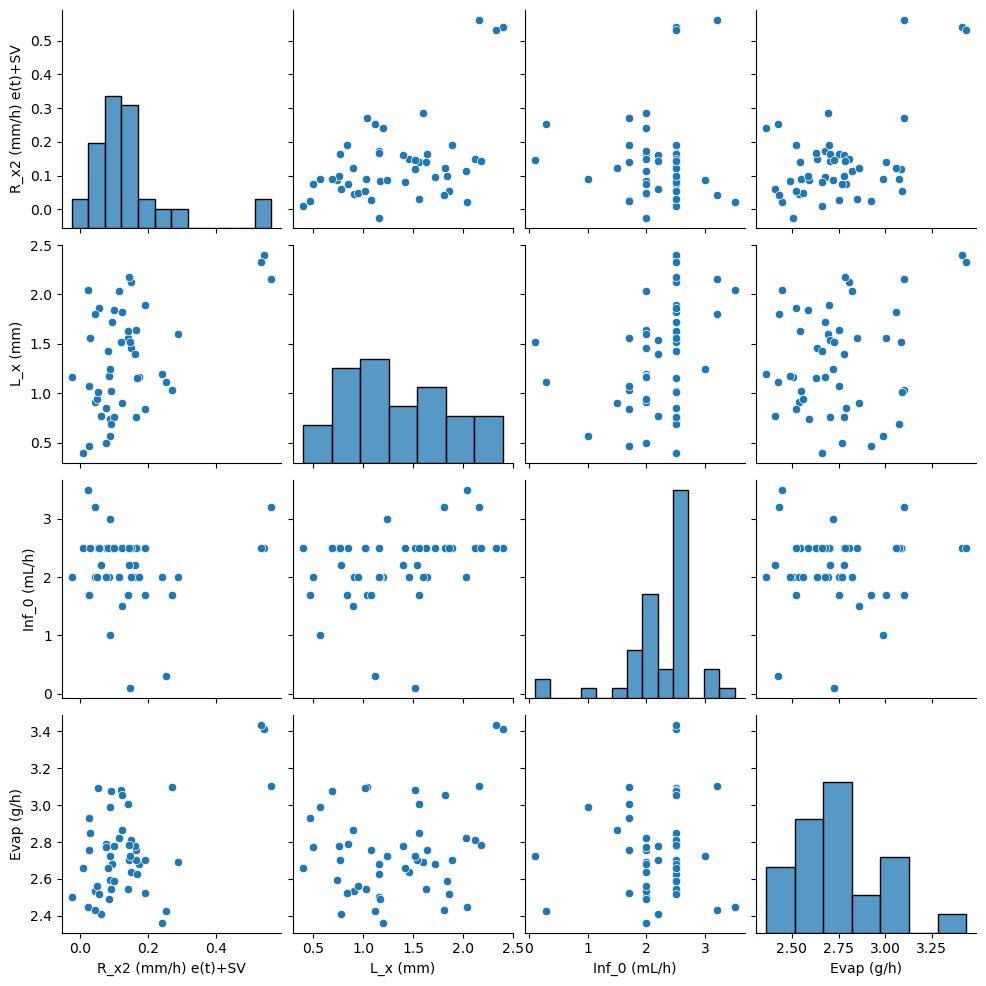

In [2]:
#filename = input('Enter filename\n')
filename = "/Users/yukiharuta/Desktop/Temp-Data/MAPbBr3-Paper/10_Data-Summary/230703-ANALYSIS-First90min.xlsx"
ans="Evap (g/h)"

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns #データ表示のためのライブラリ

df = pd.read_excel(filename, index_col=0)

sns.pairplot(df) #データ表示
plt.show()

N=300
RMSE train: 0.08, test: 0.24
R^2 train: 0.89, test: 0.21
61%


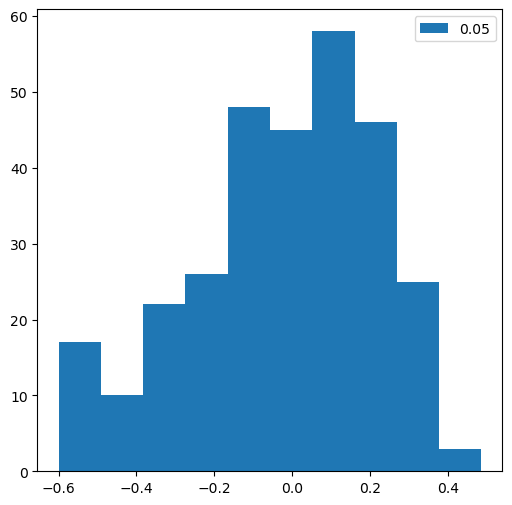

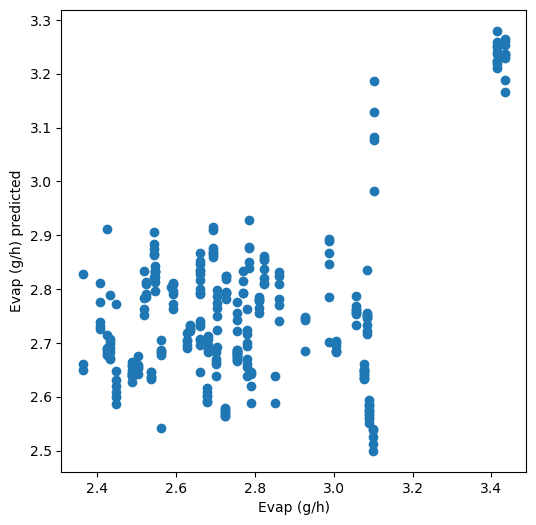

N=500
RMSE train: 0.08, test: 0.23
R^2 train: 0.89, test: 0.23
60%


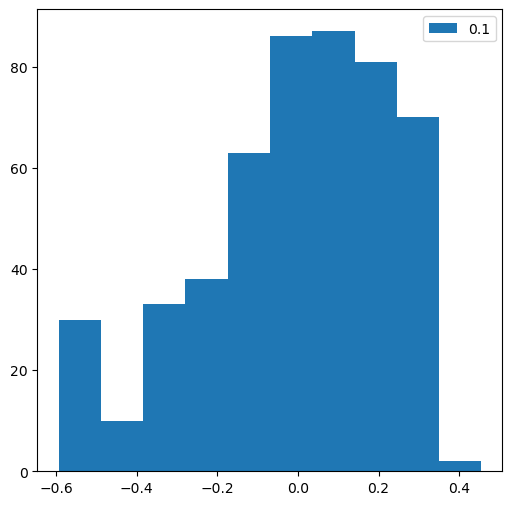

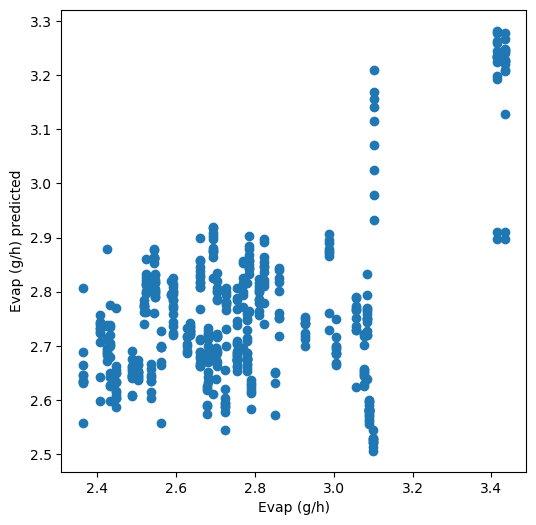

N=1500
RMSE train: 0.08, test: 0.23
R^2 train: 0.88, test: 0.11
61%


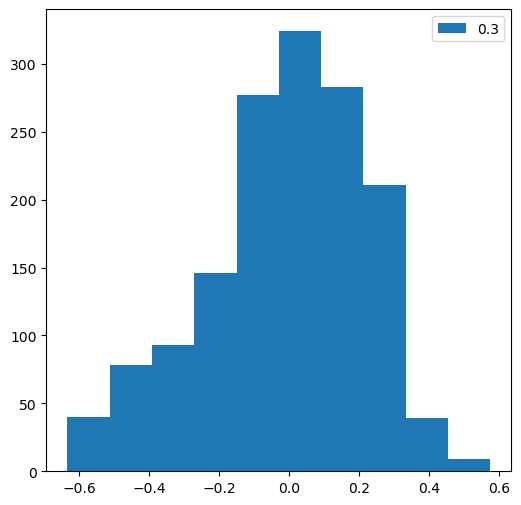

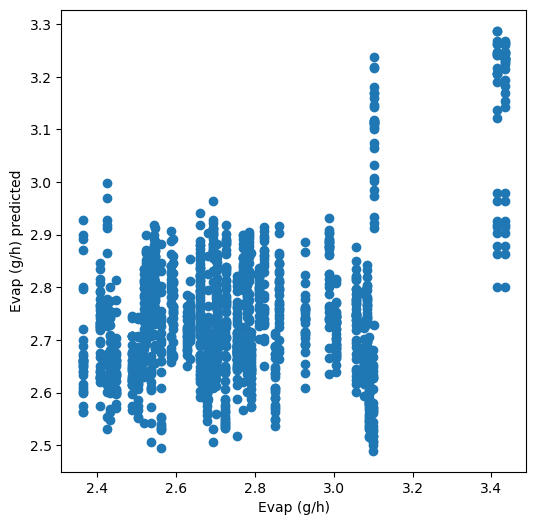

N=2500
RMSE train: 0.09, test: 0.24
R^2 train: 0.87, test: 0.05
61%


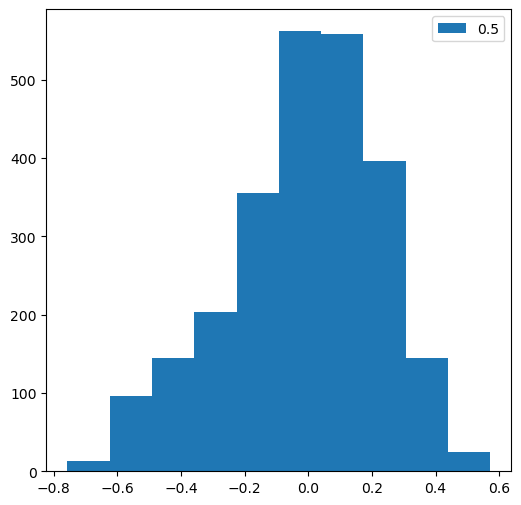

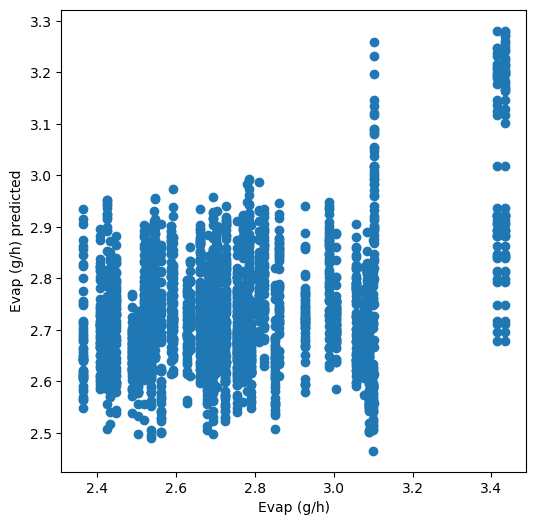

In [4]:
from sklearn.ensemble import RandomForestRegressor #ランダムフォレストを行うライブラリ
from sklearn.model_selection import train_test_split #データを分割するライブラリ
import numpy as np
from sklearn.metrics import r2_score            # 決定係数
from sklearn.metrics import mean_squared_error

col=df.columns.drop([ans])
# col=df.columns.drop('ID')
X, Y = df[col], df[ans]

tss = [0.05,0.1,0.3,0.5]
ts = 0.1

# nes = [10, 20, 50, 100, 200]
ne = 200

# mds = [10, 20, 50, 100, 200]
md = 100

for ts in tss:
    Errors = []
    Y_trains = []
    Y_train_preds = []
    Y_tests = []
    Y_test_preds = []
    
    for i in range(100):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=ts, random_state=i) #X,YをAIに学習させるデータと、テスト用のデータに分ける
        RF= RandomForestRegressor(n_estimators=ne, max_depth=md)
        RF.fit(X_train, Y_train)

        Y_test_pred  = RF.predict(X_test)
        Y_train_pred = RF.predict(X_train)
        
        Error = [a-b for a,b in zip(Y_test_pred, Y_test)]
        for e in Error:
            Errors.append(e)
        for y in Y_train:
            Y_trains.append(y)
        for y in Y_train_pred:
            Y_train_preds.append(y)
        for y in Y_test:
            Y_tests.append(y)
        for y in Y_test_pred:
            Y_test_preds.append(y)
    
    print(f'N={len(Errors)}')
    # 平均平方二乗誤差(RMSE)
    print('RMSE train: %.2f, test: %.2f' % (
            mean_squared_error(Y_trains, Y_train_preds, squared=False), # 学習
            mean_squared_error(Y_tests, Y_test_preds, squared=False)    # テスト
          ))

    # 決定係数(R^2)
    print('R^2 train: %.2f, test: %.2f' % (
            r2_score(Y_trains, Y_train_preds), # 学習
            r2_score(Y_tests, Y_test_preds)    # テスト
          ))
    
    # +- 0.05 possibility
    success = [1 for n in Errors if -0.2<n<0.2]
    print(f'{int(len(success)/len(Errors)*100)}%')
    plt.figure(figsize=(6,6))
    plt.hist(Errors, label = str(ts), density=False)
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(6,6))
    plt.scatter(Y_tests,Y_test_preds)
    plt.xlabel(ans)
    plt.ylabel(ans+" predicted")
    plt.show()

In [ ]:
F=RF.feature_importances_ #Confirm the importance of each parameter
#make a table
# FI=pd.DataFrame([df.columns,F]).T
FI=pd.DataFrame([col,F]).T
FI.columns=["Parameter","Importance"]
FI

In [ ]:
import pandas as pd
import numpy as np

test_array = []
values = []

for i in range(len(col)):
    val = float(input('input: ' + col[i] + '\n '))
    values.append(val)
    
test_array.append(values)
ndarray = np.array(test_array)
test_frame = pd.DataFrame(ndarray, columns=col)
test_frame

In [ ]:
Y_test_prediction = RF.predict(test_frame)
Y_test_prediction

In [ ]:
test_array.append([0.14,3.0,2.7])
ndarray = np.array(test_array)
test_frame = pd.DataFrame(ndarray, columns=col)
Y_test_prediction = RF.predict(test_frame)
float(Y_test_prediction[0])